In [1]:
import json

data = json.load(open('../results/lagrange_convergence.json'))

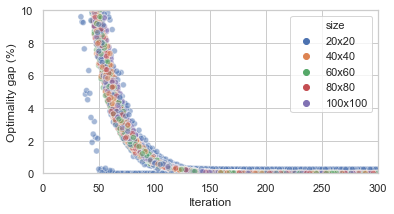

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

sns.set(style="whitegrid")

def find_size(filename):
    result = re.search("/([0-9]+)_", filename)
    if int(result.group(1)) % 20 != 0:
        return None
    return result.group(1)+"x"+result.group(1)

data2 = pd.DataFrame([{"x": p[0], "y": 100.0*p[2]/opt, "size": find_size(f)} for f, (opt, points) in data.items() for p in points if find_size(f) is not None])
data2 = data2.sample(frac=1).reset_index(drop=True)

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6, 3))
x = sns.scatterplot(x="x", y="y", hue="size", hue_order=["{}x{}".format(x,x) for x in range(20, 101, 20)], data=data2, ax=ax, alpha=0.5)
plt.ylim(0, 10)
plt.xlim(0, 300)
plt.ylabel("Optimality gap (%)")
plt.xlabel("Iteration")
plt.savefig('lagrange_convergence.pdf', format='pdf',bbox_inches='tight')
plt.show()


In [10]:
print(len(data))

100
